In [ ]:
#pip install praw pydantic ollama

  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 293.1 kB/s eta 0:00:00a 0:00:01
Using cached websocket_client-1.8.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import praw

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

from pydantic import BaseModel, Field, ValidationError
from typing import Literal

import ollama

In [3]:
import logging
handler = logging.StreamHandler()
handler.setLevel(logging.DEBUG)
for logger_name in ("praw", "prawcore"):
    logger = logging.getLogger(logger_name)
    logger.setLevel(logging.DEBUG)
    logger.addHandler(handler)

In [4]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [4]:
client_id = os.getenv("REDDIT_CLIENT_ID")
client_secret = os.getenv("REDDIT_CLIENT_SECRET")


In [5]:
reddit = praw.Reddit(
client_id =client_id,
client_secret = client_secret,
user_agent='Windows:reddit_bitcoin_scraper:v1 (by /u/Critical_Product_103)',
)

In [49]:
posts_by_date = defaultdict(list)

In [52]:
start_date = '2025-01-01'
start_date = pd.to_datetime(start_date).tz_localize('UTC')

In [90]:
subreddits_of_interest = ["WallStreetBetsCrypto"]#, "WallStreetElite", "btc", "BitcoinBeginners", "BitcoinMining", "CryptoMarkets", "CryptoCurrency", "Bitcoin", "WallStreetBetsCrypto"]

In [91]:
subreddits = reddit.subreddit("+".join(subreddits_of_interest))

In [92]:
for post in subreddits.top(time_filter= "all", limit=None):
    post_date = pd.to_datetime(post.created_utc, unit='s', utc=True)

    if post_date > start_date:
        # Collect the details of the post without comments
        post_data = {
            "post_id": post.id,  # Post ID
            "title": post.title,
            "body": post.selftext if post.selftext else "No text body (link post)",
            "author": post.author.name if post.author else "Unknown",  # Post author
            "upvotes": post.ups,  # Number of upvotes
            "downvotes": post.downs,  # Number of downvotes
            "score": post.score,  # Post score (upvotes - downvotes)
            "num_comments": post.num_comments,  # Number of comments
            "url": post.url,  # URL of the post
            "created_at": post_date,  # Post creation date
            "subreddit": post.subreddit.display_name,  # Subreddit name
        }

        # Append to the respective date key
        posts_by_date[post_date].append(post_data)
    
    else:
        continue

Fetching: GET https://oauth.reddit.com/r/WallStreetBetsCrypto/top at 1743136476.7096488
Data: None
Params: {'limit': 1024, 'raw_json': 1, 't': 'all'}
Retrying due to ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'oauth.reddit.com\', port=443): Max retries exceeded with url: /r/WallStreetBetsCrypto/top?t=all&limit=1024&raw_json=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x129ec5720>: Failed to resolve \'oauth.reddit.com\' ([Errno 8] nodename nor servname provided, or not known)"))')) status: GET https://oauth.reddit.com/r/WallStreetBetsCrypto/top
Sleeping: 1.89 seconds prior to retry
Fetching: GET https://oauth.reddit.com/r/WallStreetBetsCrypto/top at 1743136478.6070862
Data: None
Params: {'limit': 1024, 'raw_json': 1, 't': 'all'}
Retrying due to ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'oauth.reddit.com\', port=443): Max retries exceeded with url: /r/WallStreetBetsCrypto/top?t=all&limit=1024&raw_json=1 (Caused by NameResol

In [93]:
df = pd.DataFrame([p for posts in posts_by_date.values() for p in posts])


In [94]:
print(posts_by_date)

defaultdict(<class 'list'>, {Timestamp('2025-03-07 01:01:09+0000', tz='UTC'): [{'post_id': '1j5bcl6', 'title': 'Trump has just said: Globalists are behind stock market sell off.', 'body': 'No text body (link post)', 'author': 'YoloFortune', 'upvotes': 1601, 'downvotes': 0, 'score': 1601, 'num_comments': 534, 'url': 'https://i.redd.it/bs0muztg26ne1.jpeg', 'created_at': Timestamp('2025-03-07 01:01:09+0000', tz='UTC'), 'subreddit': 'WallStreetElite'}], Timestamp('2025-03-04 18:38:06+0000', tz='UTC'): [{'post_id': '1j3hyp6', 'title': 'BREAKING 📰 President Trump announces RECIPROCAL RETALIATORY TARIFFS with Canada.', 'body': 'No text body (link post)', 'author': 'YoloFortune', 'upvotes': 1499, 'downvotes': 0, 'score': 1499, 'num_comments': 1528, 'url': 'https://i.redd.it/jbfyoo6bwpme1.jpeg', 'created_at': Timestamp('2025-03-04 18:38:06+0000', tz='UTC'), 'subreddit': 'WallStreetElite'}], Timestamp('2025-03-09 08:17:23+0000', tz='UTC'): [{'post_id': '1j73402', 'title': 'Comparing stock market

In [95]:
df

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit
0,1j5bcl6,Trump has just said: Globalists are behind sto...,No text body (link post),YoloFortune,1601,0,1601,534,https://i.redd.it/bs0muztg26ne1.jpeg,2025-03-07 01:01:09+00:00,WallStreetElite
1,1j3hyp6,BREAKING 📰 President Trump announces RECIPROCA...,No text body (link post),YoloFortune,1499,0,1499,1528,https://i.redd.it/jbfyoo6bwpme1.jpeg,2025-03-04 18:38:06+00:00,WallStreetElite
2,1j73402,Comparing stock market performance during the ...,No text body (link post),YoloFortune,1327,0,1327,354,https://i.redd.it/yq1iv2g4imne1.jpeg,2025-03-09 08:17:23+00:00,WallStreetElite
3,1jebbxy,Elon Musk: This level of violence is insane an...,No text body (link post),YoloFortune,1303,0,1303,1459,https://i.redd.it/fjgwmegamhpe1.jpeg,2025-03-18 18:00:07+00:00,WallStreetElite
4,1j8wbr0,"🚨Trump has said ""Canada will pay a financial p...",No text body (link post),YoloFortune,1197,0,1197,1292,https://i.redd.it/jvhu7vu9i3oe1.jpeg,2025-03-11 17:28:31+00:00,WallStreetElite
...,...,...,...,...,...,...,...,...,...,...,...
767,1i87bob,Am gonna put 200k in xrp,Any thoughts about the profit?,Unknown,48,0,48,121,https://www.reddit.com/r/WallStreetBetsCrypto/...,2025-01-23 16:29:42+00:00,WallStreetBetsCrypto
768,1iznt7t,It seems like a simple message...,No text body (link post),Guilin_CH,48,0,48,5,https://i.redd.it/xjx8edmvdqle1.png,2025-02-27 19:12:28+00:00,WallStreetBetsCrypto
769,1i8tipm,Started in 2020. How far can I go this run?,No text body (link post),baeiby,45,0,45,67,https://www.reddit.com/gallery/1i8tipm,2025-01-24 11:42:56+00:00,WallStreetBetsCrypto
770,1i7e8vu,📉,No text body (link post),TheSn00pster,45,0,45,3,https://i.redd.it/tpucln4lhkee1.jpeg,2025-01-22 15:53:36+00:00,WallStreetBetsCrypto


In [96]:
df['date_created'] = df['created_at'].dt.date
df_sorted = df.sort_values(by=['date_created','created_at']).reset_index(drop=True)

In [97]:
df_sorted.value_counts('date_created')

date_created
2025-03-11    31
2025-03-14    24
2025-03-10    23
2025-03-04    23
2025-03-18    20
              ..
2025-01-12     1
2025-01-14     1
2025-01-09     1
2025-01-02     1
2025-01-03     1
Name: count, Length: 86, dtype: int64

In [98]:
df_sorted

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created
0,1hr2wpw,Back to the trenches…,No text body (link post),Silver-Maximum9190,6738,0,6738,166,https://i.redd.it/v2z5pd2bwdae1.jpeg,2025-01-01 13:27:06+00:00,CryptoCurrency,2025-01-01
1,1hrbs3t,Good or bad move?,"Since I don’t know shit about fuck, all I do i...",Miserable-Strike-437,101,0,101,254,https://i.redd.it/oe9p40r80gae1.jpeg,2025-01-01 20:32:43+00:00,WallStreetBetsCrypto,2025-01-01
2,1hrc9hh,"Please someone, breakdown associated fees with...",I am totally new to the crypto game and feel l...,Independent-Ad4707,61,0,61,35,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-01 20:54:40+00:00,BitcoinBeginners,2025-01-01
3,1hrszfb,Brrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr,Brrrrrr,K1DJ0N3S,503,0,503,51,https://i.redd.it/n9hza93pukae1.jpeg,2025-01-02 12:50:33+00:00,BitcoinMining,2025-01-02
4,1hsijlr,"Explain it like I'm 5, if bitcoin is valued $9...",I use EToro's virtual just to play around and ...,ExpressAffect3262,204,0,204,98,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-03 09:17:16+00:00,BitcoinBeginners,2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
767,1jkyvp2,Trump plans to impose tariffs on imported vehi...,No text body (link post),YoloFortune,2,0,2,1,https://www.reddit.com/r/WallStreetElite/comme...,2025-03-27 08:01:40+00:00,WallStreetElite,2025-03-27
768,1jkyvxk,Microsoft has cancelled new data center projec...,No text body (link post),YoloFortune,1,0,1,0,https://www.reddit.com/r/WallStreetElite/comme...,2025-03-27 08:02:18+00:00,WallStreetElite,2025-03-27
769,1jkyvzz,"Trump says ""What we're gonna be doing is a 25%...",No text body (link post),YoloFortune,10,0,10,3,https://v.redd.it/jcmpwfmsv6re1,2025-03-27 08:02:26+00:00,WallStreetElite,2025-03-27
770,1jl3b6i,Is a cold wallet really necessary?,I have an antivirus software installed on my p...,Able-Variation7265,59,0,59,54,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-27 12:58:32+00:00,BitcoinBeginners,2025-03-27


In [10]:
model_name = "llama3.2"

def classify_post(title, body):
    prompt = f"Determine if this Reddit post is relevant to Bitcoin:\nTitle: {title}\nBody: {body}\nAnswer 'Yes' or 'No' only."
    response = ollama.chat(model=model_name, messages=[{"role": "user", "content": prompt}])
    print(response)
    return response["message"]["content"]

In [109]:
df_sorted['is_relevant'] = df_sorted.apply(lambda x: classify_post(x['title'], x['body']), axis=1)

model='llama3.2' created_at='2025-03-28T04:54:30.072407Z' done=True done_reason='stop' total_duration=5100026916 load_duration=1539007166 prompt_eval_count=62 prompt_eval_duration=3539000000 eval_count=2 eval_duration=19000000 message=Message(role='assistant', content='No', images=None, tool_calls=None)
model='llama3.2' created_at='2025-03-28T04:54:30.337654Z' done=True done_reason='stop' total_duration=252834166 load_duration=12841541 prompt_eval_count=153 prompt_eval_duration=215000000 eval_count=2 eval_duration=23000000 message=Message(role='assistant', content='No', images=None, tool_calls=None)
model='llama3.2' created_at='2025-03-28T04:54:30.742953Z' done=True done_reason='stop' total_duration=401456833 load_duration=13114750 prompt_eval_count=257 prompt_eval_duration=367000000 eval_count=2 eval_duration=20000000 message=Message(role='assistant', content='Yes', images=None, tool_calls=None)
model='llama3.2' created_at='2025-03-28T04:54:30.891039Z' done=True done_reason='stop' tot

In [110]:
df_sorted

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created,is_relevant
0,1hr2wpw,Back to the trenches…,No text body (link post),Silver-Maximum9190,6738,0,6738,166,https://i.redd.it/v2z5pd2bwdae1.jpeg,2025-01-01 13:27:06+00:00,CryptoCurrency,2025-01-01,No
1,1hrbs3t,Good or bad move?,"Since I don’t know shit about fuck, all I do i...",Miserable-Strike-437,101,0,101,254,https://i.redd.it/oe9p40r80gae1.jpeg,2025-01-01 20:32:43+00:00,WallStreetBetsCrypto,2025-01-01,No
2,1hrc9hh,"Please someone, breakdown associated fees with...",I am totally new to the crypto game and feel l...,Independent-Ad4707,61,0,61,35,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-01 20:54:40+00:00,BitcoinBeginners,2025-01-01,Yes
3,1hrszfb,Brrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr,Brrrrrr,K1DJ0N3S,503,0,503,51,https://i.redd.it/n9hza93pukae1.jpeg,2025-01-02 12:50:33+00:00,BitcoinMining,2025-01-02,No
4,1hsijlr,"Explain it like I'm 5, if bitcoin is valued $9...",I use EToro's virtual just to play around and ...,ExpressAffect3262,204,0,204,98,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-03 09:17:16+00:00,BitcoinBeginners,2025-01-03,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1jkyvp2,Trump plans to impose tariffs on imported vehi...,No text body (link post),YoloFortune,2,0,2,1,https://www.reddit.com/r/WallStreetElite/comme...,2025-03-27 08:01:40+00:00,WallStreetElite,2025-03-27,No
768,1jkyvxk,Microsoft has cancelled new data center projec...,No text body (link post),YoloFortune,1,0,1,0,https://www.reddit.com/r/WallStreetElite/comme...,2025-03-27 08:02:18+00:00,WallStreetElite,2025-03-27,No
769,1jkyvzz,"Trump says ""What we're gonna be doing is a 25%...",No text body (link post),YoloFortune,10,0,10,3,https://v.redd.it/jcmpwfmsv6re1,2025-03-27 08:02:26+00:00,WallStreetElite,2025-03-27,No
770,1jl3b6i,Is a cold wallet really necessary?,I have an antivirus software installed on my p...,Able-Variation7265,59,0,59,54,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-03-27 12:58:32+00:00,BitcoinBeginners,2025-03-27,No


In [111]:
#df_filtered = df_sorted[df_sorted['is_relevant'].str.contains('Yes')]
#df_filtered = df_filtered.sort_values(by = 'created_at', ascending = True)
#want to select lower case yes or "indeed"
df_filtered = df_sorted[df_sorted['is_relevant'].str.contains('yes|indeed', case=False, regex=True)]
df_filtered = df_filtered.sort_values(by = 'created_at', ascending = True)

In [ ]:
#df_sorted['is_relevant'] = df_sorted.apply(lambda x: get_relevance(x['title'], x['body']), axis=1)

In [112]:
df_filtered

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created,is_relevant
2,1hrc9hh,"Please someone, breakdown associated fees with...",I am totally new to the crypto game and feel l...,Independent-Ad4707,61,0,61,35,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-01 20:54:40+00:00,BitcoinBeginners,2025-01-01,Yes
5,1ht56c1,ALL IN BITCOIN!!!,No text body (link post),Undervalued_stonks,3645,0,3645,850,https://i.redd.it/r2zymd4ebwae1.jpeg,2025-01-04 03:23:43+00:00,Bitcoin,2025-01-04,Yes
6,1htg1uo,Hypothetical: what happens if Trezor goes out ...,Tech companies rise and fall. Who can predict ...,Traditional_Lab_6754,65,0,65,21,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-04 14:56:44+00:00,BitcoinBeginners,2025-01-04,Yes
7,1htmaam,Dropped out of an expensive art college in 202...,No text body (link post),katamarijuana,6225,0,6225,391,https://i.redd.it/eibp67ic41be1.jpeg,2025-01-04 19:33:08+00:00,Bitcoin,2025-01-04,Yes
8,1htn9xl,What’s your realistic goal for amount of BTC y...,Assuming we’re all starting from scratch or ma...,Halloween_Oreo_,66,0,66,103,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-04 20:15:59+00:00,BitcoinBeginners,2025-01-04,Yes.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,1jjikdu,BLACKROCK EXPANDS BLOCKCHAIN-BASED MONEY MARKE...,No text body (link post),YoloFortune,2,0,2,0,https://i.redd.it/kw3upew81uqe1.jpeg,2025-03-25 12:49:27+00:00,WallStreetElite,2025-03-25,Yes
751,1jjjavw,Gen Z Americans don’t have enough saved to cov...,No text body (link post),YoloFortune,5,0,5,2,https://www.reddit.com/r/WallStreetElite/comme...,2025-03-25 13:25:55+00:00,WallStreetElite,2025-03-25,Yes
760,1jk8l8u,Was Biden the Bitcoin President after all? 😅,No text body (link post),sylsau,590,0,590,272,https://i.redd.it/3byc1m5lazqe1.png,2025-03-26 10:27:50+00:00,CryptoMarkets,2025-03-26,Yes
761,1jk91az,Bitcoin could hit $110K before $76.5K retest a...,No text body (link post),Glass-Chip-8925,5,0,5,5,https://cryptobriefing.com/bitcoin-price-predi...,2025-03-26 10:57:40+00:00,WallStreetElite,2025-03-26,Yes


In [114]:
len(df_filtered)

233

In [115]:
df_filtered['date_created'] = pd.to_datetime(df_filtered['date_created'])

iso_calendar = df_filtered['date_created'].dt.isocalendar()
df_filtered['year'] = iso_calendar.year  # Use ISO year instead of dt.year
df_filtered['week'] = iso_calendar.week
df_filtered['day'] = df_filtered['date_created'].dt.dayofweek

heatmap_data = df_filtered.groupby(['year', 'week', 'day']).size().unstack()

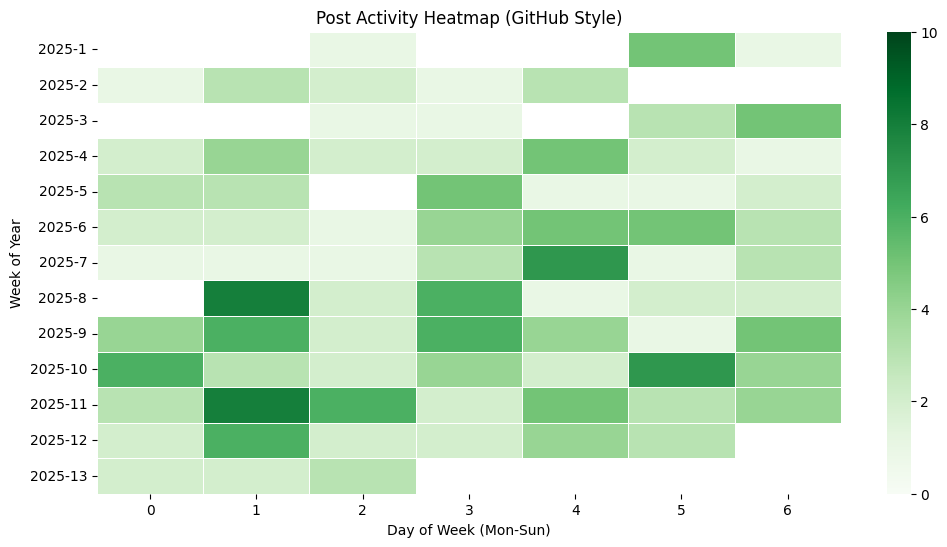

In [116]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data, cmap="Greens", linewidths=0.5, linecolor="white", vmin=0, vmax=10)
ax.set_xlabel("Day of Week (Mon-Sun)")
ax.set_ylabel("Week of Year")
ax.set_title("Post Activity Heatmap (GitHub Style)")

plt.show()

In [117]:
def get_top_comments(post_id, limit=100):
    """
    Function to fetch the top comments for a given Reddit post by post_id.
    """
    try:
        # Fetch the submission (post) using its ID
        submission = reddit.submission(id=post_id)
        
        # Get top comments (replace 'limit' with 200 to get the top 200 comments)
        submission.comments.replace_more(limit=0)  # Avoid "MoreComments" object
        top_comments = submission.comments.list()
        
        # Limit to the top 100 comments
        top_comments = top_comments[:limit]
        
        return [comment.body for comment in top_comments]  # Return the comment bodies
    
    except Exception as e:
        print(f"Error fetching comments for post {post_id}: {e}")
        return []

# Example to add top comments to your DataFrame
def run_func(df):
    top_comments_list = []
    for post_id in df['post_id']:
        if post_id:
            comments = get_top_comments(post_id)
        else:
            comments = []
        top_comments_list.append(comments)
    return top_comments_list

In [118]:
top_comments_list = run_func(df_filtered)

Fetching: GET https://oauth.reddit.com/comments/1hrc9hh/ at 1743137914.956803
Data: None
Params: {'limit': 2048, 'raw_json': 1, 'sort': 'confidence'}
Response: 200 (12846 bytes) (rst-84:rem-999.0:used-1 ratelimit) at 1743137915.5733912
Fetching: GET https://oauth.reddit.com/comments/1ht56c1/ at 1743137915.5779588
Data: None
Params: {'limit': 2048, 'raw_json': 1, 'sort': 'confidence'}
Response: 200 (66010 bytes) (rst-84:rem-998.0:used-2 ratelimit) at 1743137918.0878
Fetching: GET https://oauth.reddit.com/comments/1htg1uo/ at 1743137918.129641
Data: None
Params: {'limit': 2048, 'raw_json': 1, 'sort': 'confidence'}
Response: 200 (6408 bytes) (rst-81:rem-997.0:used-3 ratelimit) at 1743137918.7084548
Fetching: GET https://oauth.reddit.com/comments/1htmaam/ at 1743137918.713938
Data: None
Params: {'limit': 2048, 'raw_json': 1, 'sort': 'confidence'}
Response: 200 (64050 bytes) (rst-81:rem-996.0:used-4 ratelimit) at 1743137920.935143
Fetching: GET https://oauth.reddit.com/comments/1htn9xl/ at 

In [119]:
df_filtered['top_comments'] = top_comments_list

In [120]:
df_filtered

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created,is_relevant,year,week,day,top_comments
2,1hrc9hh,"Please someone, breakdown associated fees with...",I am totally new to the crypto game and feel l...,Independent-Ad4707,61,0,61,35,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-01 20:54:40+00:00,BitcoinBeginners,2025-01-01,Yes,2025,1,2,[Fees basically come in two groups. Exchange ...
5,1ht56c1,ALL IN BITCOIN!!!,No text body (link post),Undervalued_stonks,3645,0,3645,850,https://i.redd.it/r2zymd4ebwae1.jpeg,2025-01-04 03:23:43+00:00,Bitcoin,2025-01-04,Yes,2025,1,5,[Market Buy on Robinhood with $400k… damn… It’...
6,1htg1uo,Hypothetical: what happens if Trezor goes out ...,Tech companies rise and fall. Who can predict ...,Traditional_Lab_6754,65,0,65,21,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-04 14:56:44+00:00,BitcoinBeginners,2025-01-04,Yes,2025,1,5,[Nothing. You import your seed phrase into any...
7,1htmaam,Dropped out of an expensive art college in 202...,No text body (link post),katamarijuana,6225,0,6225,391,https://i.redd.it/eibp67ic41be1.jpeg,2025-01-04 19:33:08+00:00,Bitcoin,2025-01-04,Yes,2025,1,5,[Wait another couple years and you won't have ...
8,1htn9xl,What’s your realistic goal for amount of BTC y...,Assuming we’re all starting from scratch or ma...,Halloween_Oreo_,66,0,66,103,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-04 20:15:59+00:00,BitcoinBeginners,2025-01-04,Yes.,2025,1,5,[I just plan on buying forever no matter what ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,1jjikdu,BLACKROCK EXPANDS BLOCKCHAIN-BASED MONEY MARKE...,No text body (link post),YoloFortune,2,0,2,0,https://i.redd.it/kw3upew81uqe1.jpeg,2025-03-25 12:49:27+00:00,WallStreetElite,2025-03-25,Yes,2025,13,1,[]
751,1jjjavw,Gen Z Americans don’t have enough saved to cov...,No text body (link post),YoloFortune,5,0,5,2,https://www.reddit.com/r/WallStreetElite/comme...,2025-03-25 13:25:55+00:00,WallStreetElite,2025-03-25,Yes,2025,13,1,[That's been an issue since Millennials entere...
760,1jk8l8u,Was Biden the Bitcoin President after all? 😅,No text body (link post),sylsau,590,0,590,272,https://i.redd.it/3byc1m5lazqe1.png,2025-03-26 10:27:50+00:00,CryptoMarkets,2025-03-26,Yes,2025,13,2,[Maybe regulations aren’t such a bad thing aft...
761,1jk91az,Bitcoin could hit $110K before $76.5K retest a...,No text body (link post),Glass-Chip-8925,5,0,5,5,https://cryptobriefing.com/bitcoin-price-predi...,2025-03-26 10:57:40+00:00,WallStreetElite,2025-03-26,Yes,2025,13,2,"[Pump N Dump!, [deleted], US federal governmen..."


In [121]:
df_filtered.to_parquet("../data/raw/reddit_relevant_posts_jan_to_march.parquet")

In [5]:
df_filtered = pd.read_parquet('../data/raw/reddit_relevant_posts_jan_to_march.parquet')

In [6]:
class Sentiment(BaseModel):
    """ Sentiment of Bitcoin outlook from the financial news"""
    sentiment: Literal["positive", "negative", "neutral"]

    @classmethod
    def from_response(cls, response: str):
        """Parse and validate response from Ollama"""
        try:
            normalized_response = response.strip().lower()  
            if normalized_response not in {"positive", "negative", "neutral"}:
                raise ValueError(f"Unexpected sentiment: {normalized_response}")
            return cls(sentiment=normalized_response)
        except (ValidationError, ValueError) as e:
            print(f"Error parsing response: {e}; Response: {response}")
            return cls(sentiment="neutral")  # fallback to neutral


In [7]:
slang_definitions = """
1. Stonk
Stonk means stock. The meme was a cheeky reference to making bad financial decisions, sort of like someone who cannot even pronounce stocks correctly.

2. Diamond Hands
The term “diamond hands” refers to holding on to a stock or option despite volatility and losses in the confidence that its price will eventually increase. On memes, the phrase is represented with emojis of a diamond and then hands. The term actually indicates risk taking, and is sometimes the folly of stubbornly holding on to a stock or option until the bitter end, even when the ship should have been abandoned long ago. Whether having diamond hands is good or bad will probably depend on the final outcome of the ticker symbol.

3. Tendies
Tendies is short for chicken tenders. The term moved to r/wallstreetbets where members used it self-deprecatingly in reference to their own living arrangements. Eventually, the term came to be associated with money or profit made from stock trading and options trading, which is how it’s most frequently used today.

4. YOLO
You only live once. This term actually seems to originate from the notion encapsulated in the Latin “carpe diem” (seize the day). In internet parlance, YOLO often humorously refers to an extremely risky choice that seems simultaneously laughable and dangerous. On Wallstreetbets, YOLO could apply to a trade where an investor puts in the majority of their capital—for instance, putting 95 percent of their account into Dogecoin.

5. HODL
HODL might seem to stand for Hold on For Dear Life, the encapsulated notion of which is also popularly expressed in the phrase Hold the Line. But actually, HODL really came about because of a typo for hold.

It all started on December 18th in 2013, when user GameKyuubi posted an inebriated, typo-filled, and only partially coherent internet rant about his poor trading skills, and how it would be better for people like himself to avoid day trading and stick to a buy and hold principle. The title of the post was I AM HODLING, and the rest is history. Images from Braveheart, 300, and Game of Thrones have provided the meme substance for promoters of the HODL principle—that is, avoid trading decisions based on short term swings, which can be simply ruinous for stock investors who do not know what they are doing. The HODL principle is particularly discussed in the cryptocurrency venue, where it contrasts against principles such as FOMO (the fear of missing out).

6. To the Moon
As you might guess, this term indicates that a given stock is going to have wild success in terms of its price increase, resulting in a lot of tendies for investors. In emojis, this phrase is indicated by rockets.

If you see a sizable number of community members using this phrase to discuss a ticker symbol, it might be something you want to pay attention to. Of course, there are certainly other factors as to whether or not that translates to tangible success beyond the reddit threads.

7. Apes Together Strong
Often represented with a gorilla emoji, the “apes together strong” phrase comes from Planet of the Apes. Apes are retail investors who feel bullish (optimistic) about a particular stock that is expected by short sellers to drop in price. If enough retail investors band together, they can be strong enough to drive up the price of the stock and defeat the goal of the short sellers, who want the price to fall.

Apes together strong encapsulates the idea of the proverbial little man uniting with other everyday people to defeat more powerful institutional investors.

8. Bears
A bear investor is one who feels bearish about a particular stock (or even the stock market in general). They are somewhat of a debbie downer on the r/wallstreetbets forum, and may become the butt end of jokes and insults, since most community members are looking for that next stock or cryptocurrency to go to the moon.

Tangentially, the phrases bear market and bull market relate to whether the market is going up and down. Since bears strike by coming down on their target, a bear market suggests decreasing stock prices. Because bulls gore their target by moving their horns upward, a bull market suggests increasing prices.

9. Buy High Sell Low
This is a joke about losses, expressed in a joking reference to the traditional, sensible, and simple advice of buy low and sell high. Someone who bought high and sold low has failed miserably at turning a particular trade into something financially profitable, leaving them at the mercy of jabs from other community members.

10. Buy the Dip
For members who feel overall bullish about a particular stop, slight dips in its generally upward price are a momentary respite to buy the stock at a discount. Buying the dip expresses this timely trade, and is often paired with Diamond Hands and To the Moon for a potent meme trio.

11. Paper Hands
Paper hands are the opposite of diamond hands, referencing traders who unload their shares at the first sign of bad news. As you can imagine, the connotation here is somewhat negative in its indication of a trader who acts too quickly, out of fear.

12. We Like the Stock
This phrase comes from Jim Cramer, who was the host of Mad Money on CNBC. The simple phrase is used to indicate a favorable attitude toward holding a stock, much in the same way that Cramer would have used the phrase. 

Use these definitions when analyzing the sentiment of the comments 
"""



In [8]:
def get_sentiment(post_title, post_body, comments):
    prompt = f"""

    {slang_definitions}
    
    Given the title and body of a post and a list of comments in response, analyze the overall sentiment of the comments to determine if the general outlook on Bitcoin or BTC is positive, negative, or neutral.

    Post Title: "{post_title}"
    Post Body: "{post_body}"
    Comments:
    {comments}

    Provide a single-word label: positive, negative, or neutral in lowercase.
    Only return the label without additional text.

    """

    response = ollama.chat(model=model_name, messages=[{"role": "user", "content": prompt}])
    print(response)
    return Sentiment.from_response(response["message"]["content"])

In [11]:
df_filtered["overall_sentiment"] = df_filtered.apply(lambda row: get_sentiment(row["title"], row["body"], row["top_comments"]), axis=1)

model='llama3.2' created_at='2025-03-28T05:39:27.404341Z' done=True done_reason='stop' total_duration=7165225125 load_duration=729871334 prompt_eval_count=2048 prompt_eval_duration=6401000000 eval_count=2 eval_duration=32000000 message=Message(role='assistant', content='neutral', images=None, tool_calls=None)
model='llama3.2' created_at='2025-03-28T05:39:31.11393Z' done=True done_reason='stop' total_duration=3698764875 load_duration=10360083 prompt_eval_count=2048 prompt_eval_duration=3654000000 eval_count=2 eval_duration=32000000 message=Message(role='assistant', content='positive', images=None, tool_calls=None)
model='llama3.2' created_at='2025-03-28T05:39:34.792294Z' done=True done_reason='stop' total_duration=3675573333 load_duration=9693833 prompt_eval_count=2048 prompt_eval_duration=3632000000 eval_count=2 eval_duration=32000000 message=Message(role='assistant', content='neutral', images=None, tool_calls=None)
model='llama3.2' created_at='2025-03-28T05:39:38.471717Z' done=True do

In [15]:
df_filtered["overall_sentiment"] = df_filtered["overall_sentiment"].apply(lambda x: x.sentiment if isinstance(x, Sentiment) else x)

In [16]:
df_filtered

,post_id,title,body,author,upvotes,downvotes,score,num_comments,url,created_at,subreddit,date_created,is_relevant,year,week,day,top_comments,overall_sentiment,sentiment_score
2,1hrc9hh,"Please someone, breakdown associated fees with...",I am totally new to the crypto game and feel l...,Independent-Ad4707,61,0,61,35,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-01 20:54:40+00:00,BitcoinBeginners,2025-01-01,Yes,2025,1,2,[Fees basically come in two groups. Exchange ...,neutral,0
5,1ht56c1,ALL IN BITCOIN!!!,No text body (link post),Undervalued_stonks,3645,0,3645,850,https://i.redd.it/r2zymd4ebwae1.jpeg,2025-01-04 03:23:43+00:00,Bitcoin,2025-01-04,Yes,2025,1,5,[Market Buy on Robinhood with $400k… damn… It’...,positive,1
6,1htg1uo,Hypothetical: what happens if Trezor goes out ...,Tech companies rise and fall. Who can predict ...,Traditional_Lab_6754,65,0,65,21,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-04 14:56:44+00:00,BitcoinBeginners,2025-01-04,Yes,2025,1,5,[Nothing. You import your seed phrase into any...,neutral,0
7,1htmaam,Dropped out of an expensive art college in 202...,No text body (link post),katamarijuana,6225,0,6225,391,https://i.redd.it/eibp67ic41be1.jpeg,2025-01-04 19:33:08+00:00,Bitcoin,2025-01-04,Yes,2025,1,5,[Wait another couple years and you won't have ...,neutral,0
8,1htn9xl,What’s your realistic goal for amount of BTC y...,Assuming we’re all starting from scratch or ma...,Halloween_Oreo_,66,0,66,103,https://www.reddit.com/r/BitcoinBeginners/comm...,2025-01-04 20:15:59+00:00,BitcoinBeginners,2025-01-04,Yes.,2025,1,5,[I just plan on buying forever no matter what ...,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,1jjikdu,BLACKROCK EXPANDS BLOCKCHAIN-BASED MONEY MARKE...,No text body (link post),YoloFortune,2,0,2,0,https://i.redd.it/kw3upew81uqe1.jpeg,2025-03-25 12:49:27+00:00,WallStreetElite,2025-03-25,Yes,2025,13,1,[],neutral,0
751,1jjjavw,Gen Z Americans don’t have enough saved to cov...,No text body (link post),YoloFortune,5,0,5,2,https://www.reddit.com/r/WallStreetElite/comme...,2025-03-25 13:25:55+00:00,WallStreetElite,2025-03-25,Yes,2025,13,1,[That's been an issue since Millennials entere...,neutral,0
760,1jk8l8u,Was Biden the Bitcoin President after all? 😅,No text body (link post),sylsau,590,0,590,272,https://i.redd.it/3byc1m5lazqe1.png,2025-03-26 10:27:50+00:00,CryptoMarkets,2025-03-26,Yes,2025,13,2,[Maybe regulations aren’t such a bad thing aft...,neutral,0
761,1jk91az,Bitcoin could hit $110K before $76.5K retest a...,No text body (link post),Glass-Chip-8925,5,0,5,5,https://cryptobriefing.com/bitcoin-price-predi...,2025-03-26 10:57:40+00:00,WallStreetElite,2025-03-26,Yes,2025,13,2,"[Pump N Dump!, [deleted], US federal governmen...",neutral,0


In [17]:
sentiment_mapping = {"positive": 1, "negative": -1, "neutral": 0}
df_filtered["sentiment_score"] = df_filtered["overall_sentiment"].map(sentiment_mapping)

iso_calendar = df_filtered['date_created'].dt.isocalendar()
df_filtered['year'] = iso_calendar.year  # Use ISO year instead of dt.year
df_filtered['week'] = iso_calendar.week
df_filtered['day'] = df_filtered['date_created'].dt.dayofweek

heatmap_data_2 = df_filtered.groupby(["year", "week", "day"])["sentiment_score"].mean().unstack()

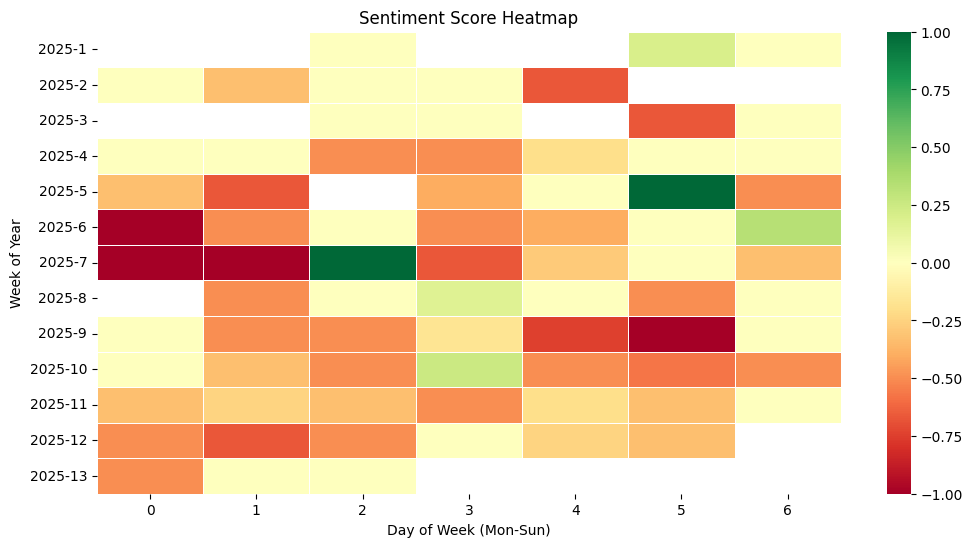

In [18]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data_2, cmap="RdYlGn", linewidths=0.5, linecolor="white", center=0, vmin=-1, vmax=1)
ax.set_xlabel("Day of Week (Mon-Sun)")
ax.set_ylabel("Week of Year")
ax.set_title("Sentiment Score Heatmap")
plt.show()

In [19]:
df_filtered.to_parquet('../data/processed/reddit_relevant_posts_jan_to_march_with_sentiment.parquet', index=False)

In [20]:
rate_limit_info = reddit.auth.limits
print(rate_limit_info)

NameError: name 'reddit' is not defined

In [21]:
from datetime import datetime

reset_time = pd.to_datetime(rate_limit_info['reset_timestamp'],unit = "s",utc = True).tz_convert("Asia/Singapore")  # Convert to UTC time
print("Rate limit resets at (SGT):", reset_time.strftime('%Y-%m-%d %H:%M:%S %Z'))

NameError: name 'rate_limit_info' is not defined

In [ ]:
df_filtered.to_csv(r'..\data\processed\reddit_relevant_posts_with_sentiment.csv', index=False)